In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Reshape, Input

In [3]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, n_classes, shuffle):
        'Initialization'
        self.list_IDs = list_IDs
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / 1))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*1:(index+1)*1]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        
        X = np.load(list_IDs_temp[0], allow_pickle=True)
        X = X + np.random.randn()*10
        X = (X-X.mean())/X.std()
        
        y = np.zeros((len(X), self.n_classes))
        for i in range(len(X)):
            y[i][i//100] = 1
        
        Z = list(zip(X,y))
        np.random.shuffle(Z)
        X, y = zip(*Z)
        X = np.array(X)
        y = np.array(y)
        
        return X, y

In [4]:
training_generator = DataGenerator(['xTrain.npy'], n_classes=11, shuffle=True)
validation_generator = DataGenerator(['xVal.npy'], n_classes=11, shuffle=True)

for i in range(len(training_generator)):
    item = training_generator.__getitem__(i)
    print(item, item[0].shape, item[1].shape)

(array([[ 7.97483288e-01,  6.85017060e-01,  8.17413349e-01, ...,
         8.36675774e-01,  1.01285703e+00,  8.01843029e-01],
       [ 2.11898383e-01, -6.64775135e-02, -2.20231396e-01, ...,
         4.63329977e-01, -7.04866856e-03, -3.20848435e-02],
       [-1.86085219e-01, -6.36037772e-02, -1.78417749e-01, ...,
        -3.20896017e-02, -5.26242153e-02, -2.37548189e-04],
       ...,
       [-1.11948865e+00, -5.34639627e-01, -8.03472107e-01, ...,
        -6.83779683e-01, -6.31515823e-01, -6.06398778e-01],
       [-6.69061480e-02,  1.29841128e-01, -1.96996840e-01, ...,
         2.31518822e-01,  1.22681340e-01,  1.11516257e-01],
       [ 9.39317118e-01,  6.36753205e-01,  6.81508887e-01, ...,
         1.03524806e+00,  7.41891587e-01,  9.43911122e-01]]), array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]]))

In [5]:
model = Sequential([
    Dense(256, input_shape=(10,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002) ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(256, activation='relu' ),
    Dense(11, activation='softmax' ),
    
    #Dense(10, input_shape=(10,)),
    #Activation('relu'),
    #Dense(5),
    #Activation('softmax'),
    #Dense(11),
])
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), \
    metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6

In [9]:
# Train model on dataset
history = model.fit_generator(generator=training_generator, \
    validation_data=validation_generator, epochs=150 )

Epoch 1/150
1/1 [==============================] - 0s 212ms/step - loss: 0.4011 - categorical_accuracy: 0.8527 - val_loss: 0.4586 - val_categorical_accuracy: 0.8555
Epoch 2/150
1/1 [==============================] - 0s 237ms/step - loss: 0.2747 - categorical_accuracy: 0.9164 - val_loss: 0.5757 - val_categorical_accuracy: 0.8291
Epoch 3/150
1/1 [==============================] - 0s 210ms/step - loss: 0.4173 - categorical_accuracy: 0.8464 - val_loss: 0.5013 - val_categorical_accuracy: 0.8409
Epoch 4/150
1/1 [==============================] - 0s 249ms/step - loss: 0.3143 - categorical_accuracy: 0.8964 - val_loss: 0.5095 - val_categorical_accuracy: 0.8355
Epoch 5/150
1/1 [==============================] - 0s 212ms/step - loss: 0.2908 - categorical_accuracy: 0.9082 - val_loss: 0.5064 - val_categorical_accuracy: 0.8318
Epoch 6/150
1/1 [==============================] - 0s 225ms/step - loss: 0.2920 - categorical_accuracy: 0.9145 - val_loss: 0.4568 - val_categorical_accuracy: 0.8500
Epoch 7/15

Epoch 51/150
1/1 [==============================] - 0s 238ms/step - loss: 0.6087 - categorical_accuracy: 0.8309 - val_loss: 0.6561 - val_categorical_accuracy: 0.8255
Epoch 52/150
1/1 [==============================] - 0s 262ms/step - loss: 0.2273 - categorical_accuracy: 0.9073 - val_loss: 0.9068 - val_categorical_accuracy: 0.7382
Epoch 53/150
1/1 [==============================] - 0s 260ms/step - loss: 0.4786 - categorical_accuracy: 0.8355 - val_loss: 0.9748 - val_categorical_accuracy: 0.7327
Epoch 54/150
1/1 [==============================] - 0s 246ms/step - loss: 0.7306 - categorical_accuracy: 0.7518 - val_loss: 0.9721 - val_categorical_accuracy: 0.7355
Epoch 55/150
1/1 [==============================] - 0s 251ms/step - loss: 0.4808 - categorical_accuracy: 0.8100 - val_loss: 0.8624 - val_categorical_accuracy: 0.7382
Epoch 56/150
1/1 [==============================] - 0s 231ms/step - loss: 0.4817 - categorical_accuracy: 0.7973 - val_loss: 0.5968 - val_categorical_accuracy: 0.7755
Epoc

Epoch 101/150
1/1 [==============================] - 0s 251ms/step - loss: 0.1400 - categorical_accuracy: 0.9473 - val_loss: 0.5598 - val_categorical_accuracy: 0.8418
Epoch 102/150
1/1 [==============================] - 0s 252ms/step - loss: 0.1668 - categorical_accuracy: 0.9336 - val_loss: 0.5387 - val_categorical_accuracy: 0.8591
Epoch 103/150
1/1 [==============================] - 0s 252ms/step - loss: 0.1365 - categorical_accuracy: 0.9482 - val_loss: 0.6105 - val_categorical_accuracy: 0.8255
Epoch 104/150
1/1 [==============================] - 0s 253ms/step - loss: 0.1614 - categorical_accuracy: 0.9336 - val_loss: 0.5427 - val_categorical_accuracy: 0.8591
Epoch 105/150
1/1 [==============================] - 0s 264ms/step - loss: 0.1246 - categorical_accuracy: 0.9618 - val_loss: 0.5665 - val_categorical_accuracy: 0.8509
Epoch 106/150
1/1 [==============================] - 0s 231ms/step - loss: 0.1529 - categorical_accuracy: 0.9445 - val_loss: 0.5523 - val_categorical_accuracy: 0.853

1/1 [==============================] - 0s 244ms/step - loss: 0.1085 - categorical_accuracy: 0.9627 - val_loss: 0.6318 - val_categorical_accuracy: 0.8536


In [10]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

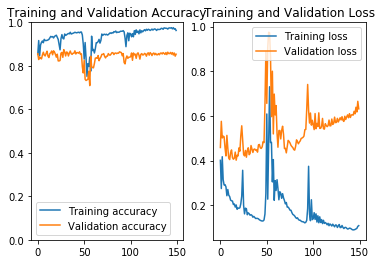

In [11]:
#plt.figure(figsize=(8, 8))

plt.subplot(1,2,1)
plt.ylim(0,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and Validation Accuracy')
plt.legend(labels=['Training accuracy', 'Validation accuracy'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(labels=['Training loss', 'Validation loss'], loc='best')

plt.show()

In [12]:
model.save('DNN_model.h5')

(1100, 10)


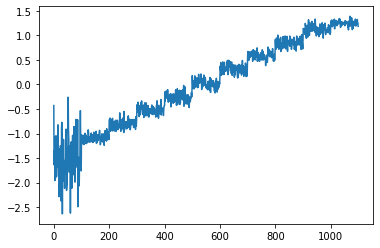

In [13]:
train = np.load('xTrain.npy', allow_pickle=True)
train2 = np.load('xTrain.npy', allow_pickle=True)

train = train.reshape(len(train), 10)
train = (train-train.mean())/train.std()
print(train.shape)

train_mean = [ row.mean() for row in train]
plt.plot(np.arange(len(train_mean)), train_mean)
plt.show()

In [9]:
tr, fa = 0, 0
for i in range(len(train)):
    data = train[i][np.newaxis, :]
    pred = model.predict(data)
    if np.argmax(pred) == i//100:
        tr+=1
    else:
        fa+=1
tr, fa, tr/(tr+fa)

(1024, 76, 0.9309090909090909)

(1600, 10)


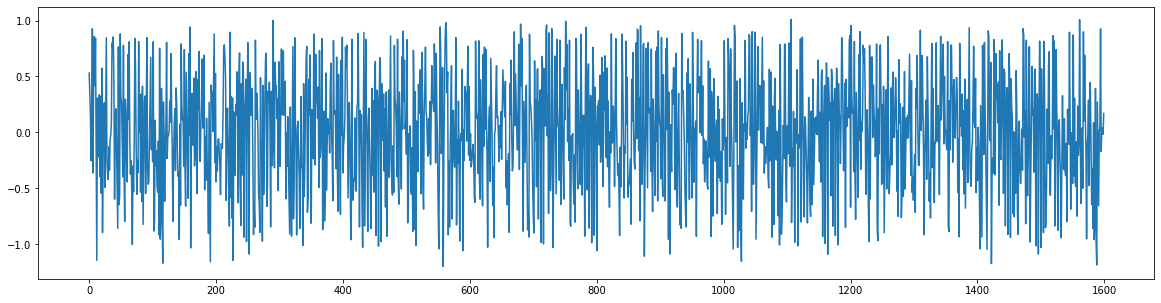

In [19]:
test = np.load('test.npy', allow_pickle=True)
test_raw = np.load('test.npy', allow_pickle=True)

test = test.reshape(len(test), 10)
test = (test-test.mean())/test.std()
print(test.shape)

test_mean = [ row.mean() for row in test]
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(test_mean)), test_mean)
plt.show()

In [20]:
compare, result = [], []
for i in range(len(test)):
    data = np.array([ test[i] ])
    pred = model.predict(data)
    compare.append( (np.argmax(pred), test_raw[i].mean()) )
    result.append(np.argmax(pred))

np.save('result.npy', result)
compare.sort(key=lambda x:x[1])
for row in compare:
    print(row)

(0, 53.170679782806815)
(0, 53.35469037626159)
(0, 53.52794435904347)
(0, 53.5796038342537)
(0, 53.754458542878226)
(0, 53.818417719285165)
(0, 53.903709822667714)
(0, 53.93045721455297)
(0, 54.44571093059549)
(0, 54.69008827881525)
(0, 54.719767624210384)
(0, 54.720948063631546)
(0, 54.72336601054089)
(0, 55.12784411782887)
(0, 55.13712068575332)
(0, 55.301737501958314)
(0, 55.34559774805799)
(0, 55.35963154309353)
(0, 55.36251044776721)
(0, 55.47866794931472)
(0, 55.52042243191251)
(0, 55.541652111091686)
(0, 55.54481593051884)
(0, 55.569292614693346)
(0, 55.580694278963605)
(0, 55.71003489855816)
(0, 55.74294859359087)
(0, 55.745296623376774)
(0, 55.77082741130738)
(0, 55.79182298233293)
(0, 55.865822385460355)
(0, 55.877504930704944)
(0, 55.91051417461538)
(0, 55.992707721948264)
(0, 56.03942343263119)
(0, 56.13036820597296)
(0, 56.17995175115742)
(0, 56.20018963984205)
(0, 56.22086828516315)
(0, 56.250764195480755)
(0, 56.270674036138146)
(0, 56.28978829249812)
(0, 56.333771434425

7 0 0 0 5 8 0 7 8 6 8 4 0 6 5 4 6 0 6 0 7 0 4 6 6 0 0 8 0 0 0 4 4 4 0 5 8 8 8 6 0 0 6 4 0 0 8 0 0 8 0 6 0 0 8 0 0 6 6 4 0 8 0 8 0 0 4 0 0 4 0 0 8 7 0 0 4 2 8 5 6 0 6 0 6 0 3 6 6 0 0 8 0 0 0 5 6 8 4 0 0 8 0 0 0 3 0 0 0 5 0 8 0 0 6 0 0 0 5 0 4 5 8 4 0 5 0 0 0 8 5 0 0 0 5 6 0 6 0 4 0 3 0 0 0 8 0 5 0 0 8 0 0 7 5 4 0 8 0 8 0 5 0 6 5 7 0 0 7 5 0 6 0 8 4 4 5 0 8 0 6 7 0 0 0 0 0 0 0 0 0 0 6 6 6 5 6 8 0 7 3 0 0 0 10 0 0 0 5 5 0 5 8 8 8 7 0 0 5 5 0 0 8 0 6 0 0 0 6 5 0 6 6 7 6 0 7 7 0 0 6 0 7 7 0 5 6 7 0 0 8 6 0 7 0 6 0 6 3 0 0 0 8 8 6 6 5 0 0 0 7 0 0 0 6 0 0 6 8 7 0 0 6 6 7 5 0 6 3 4 8 5 0 8 6 6 5 6 0 7 4 4 0 8 5 0 8 10 6 6 0 0 0 0 0 0 0 0 0 0 0 8 0 0 8 0 4 0 0 0 0 0 0 3 6 0 0 0 7 0 0 6 8 8 0 0 7 6 8 5 0 6 4 4 8 4 0 8 6 7 5 6 0 8 4 5 0 8 0 0 5 0 0 7 0 4 6 0 0 4 7 7 0 4 0 8 0 6 0 0 7 0 0 7 5 4 0 8 0 8 4 5 0 5 8 8 8 6 0 0 6 5 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 6 0 0 0 0 0 8 0 0 8 0 5 0 0 0 0 0 0 3 6 0 6 0 7 7 0 5 7 6 0 0 7 7 0 6 0 5 6 0 5 0 6 0 4 5 7 0 0 8 0 0 0 2 0 8 0 6 0 0 8 0 0 6 5 4 0 7 0 9 5 8 5 

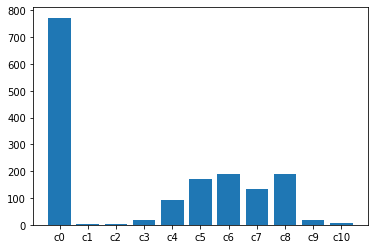

In [24]:
total_class = np.zeros(11)
for num in result:
    total_class[num]+=1
    print(num, end=' ')

plt.bar(['c{}'.format(i) for i in range(11)], total_class)
plt.show()

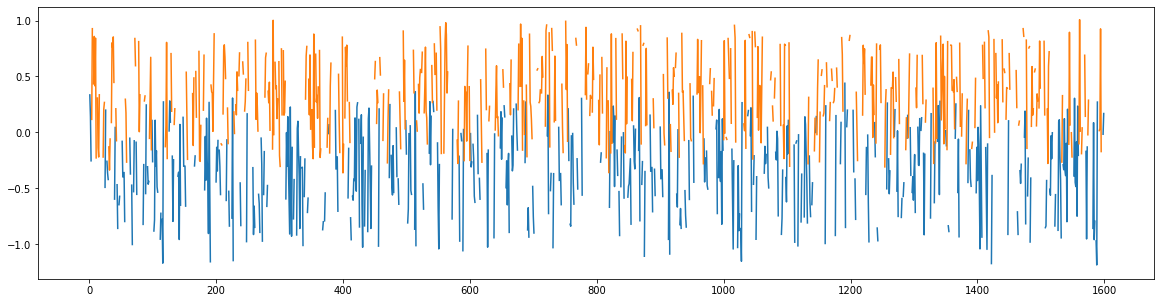

In [44]:
test_abmean = [None]*len(test_mean)

for i in range(len(test_mean)):
    if result[i] >3:
        test_abmean[i] = test_mean[i]
        test_mean[i] = None

plt.figure(figsize=(20,5))
plt.plot(np.arange(len(test_mean)), test_mean)
plt.plot(np.arange(len(test_mean)), test_abmean)
plt.show()